In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sms
%matplotlib inline


In [39]:
data_train=pd.read_csv("data/train_u6lujuX_CVtuZ9i.csv")
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [40]:
data_train.shape

(614, 13)

In [41]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [84]:
data_train['Loan_Amount_Term'] = data_train['Loan_Amount_Term'].astype('category')
data_train['Credit_History'] = data_train['Credit_History'].astype('category')


In [85]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountLog,totalIncome,totalIncomeLog
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,4.857444,7024.705081,8.669414
std,6109.041673,2926.248369,84.037468,0.495995,6458.663872,0.545102
min,150.000000,0.000000,9.000000,2.197225,1442.000000,7.273786
25%,2877.500000,0.000000,100.250000,4.607658,4166.000000,8.334712
50%,3812.500000,1188.500000,129.000000,4.857444,5416.500000,8.597205
75%,5795.000000,2297.250000,164.750000,5.104426,7521.750000,8.925549
max,81000.000000,41667.000000,700.000000,6.551080,81000.000000,11.302204


In [86]:
data_train['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [87]:
data_train['Credit_History'].unique()

[1.0, 0.0]
Categories (2, float64): [0.0, 1.0]

In [88]:
pd.crosstab(data_train.Credit_History,data_train['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,110,415


<Axes: >

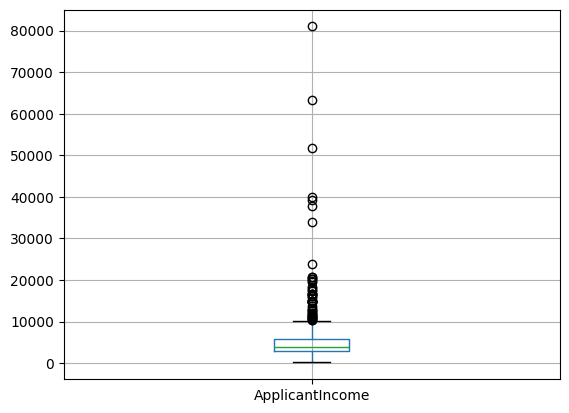

In [89]:
data_train.boxplot('ApplicantIncome')

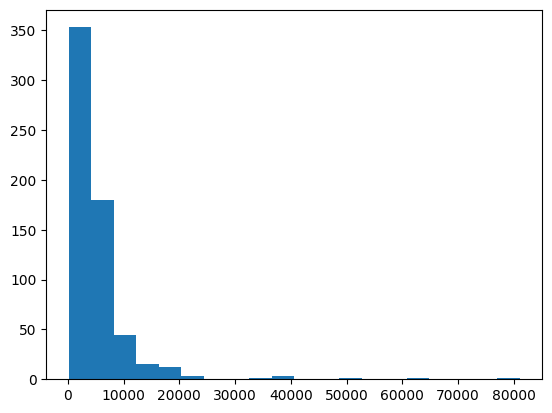

In [90]:
plt.hist(data_train['ApplicantIncome'],bins=20)
plt.show()

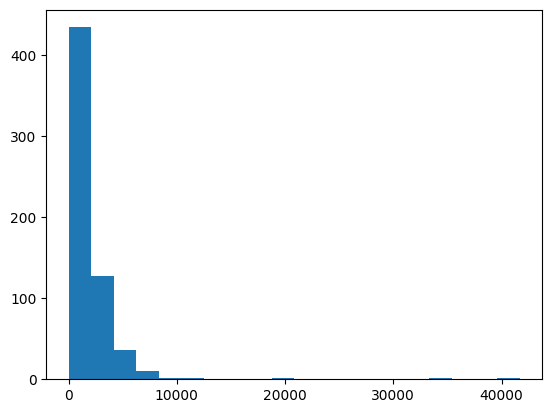

In [91]:
plt.hist(data_train['CoapplicantIncome'],bins=20)
plt.show()

### Relation between the apllication income and thier education

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

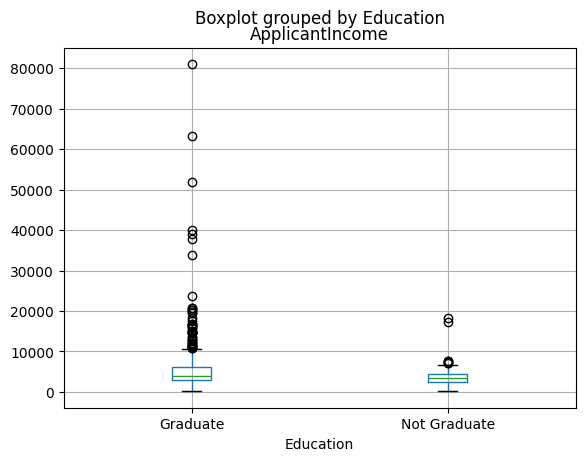

In [92]:
data_train.boxplot(column=['ApplicantIncome'],by='Education')

Relation not significative;
have the same mean;
but we notice the first one has more outliers(some Graduate hase a big ammote of salyry)

In [93]:
data_train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

<Axes: >

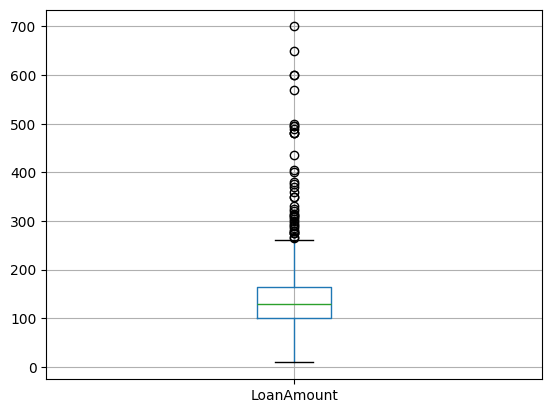

In [94]:
data_train.boxplot(column='LoanAmount')

<Axes: >

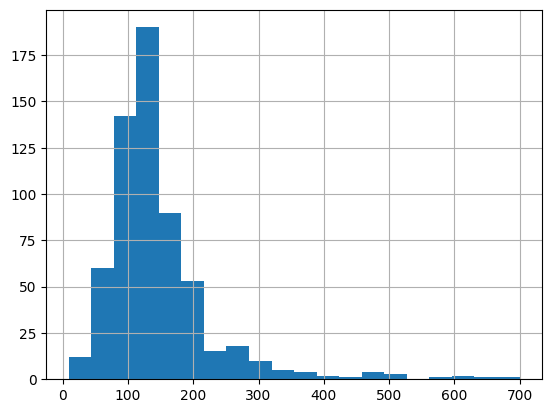

In [95]:
data_train['LoanAmount'].hist(bins=20)

In [96]:
data_train['LoanAmountLog']=np.log(data_train['LoanAmount'])

<Axes: >

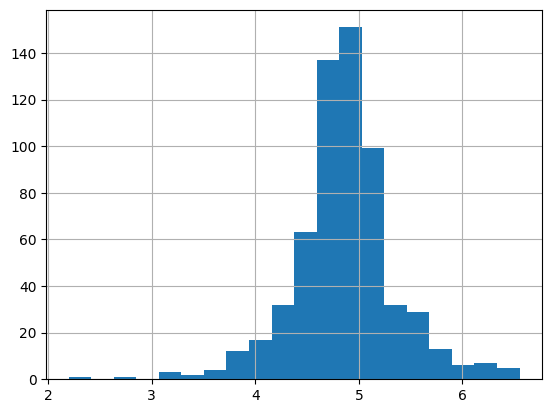

In [97]:
data_train['LoanAmountLog'].hist(bins=20)

In [98]:
data_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmountLog        0
totalIncome          0
totalIncomeLog       0
dtype: int64

### Filling the misssing value

In [99]:
data_train['Gender']=data_train['Gender'].fillna(data_train['Gender'].mode())

<Axes: ylabel='Persntage of Gender'>

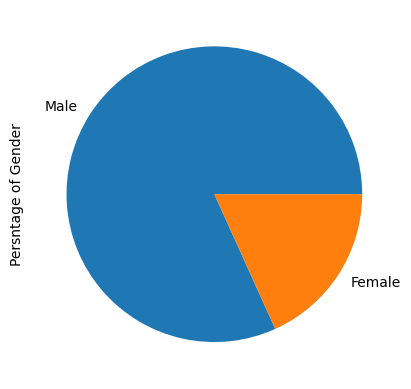

In [100]:
data_train['Gender'].value_counts().plot(kind='pie',ylabel='Persntage of Gender')

In [101]:
#Loan_Amount_Term #Credit_History ==> float but consider them as categorical data

In [102]:
def fill_missing_vals(data):
    for col in data.columns[1:]:
        if data[col].dtype in ['float64', 'int64']:
            data[col] = data[col].fillna(data[col].mean())
        else:
            # Fill missing values with the mode for non-numeric columns
            mode_value = data[col].mode()
            if not mode_value.empty:
                data[col] = data[col].fillna(mode_value[0])

In [103]:
fill_missing_vals(data_train)

In [104]:
data_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmountLog        0
totalIncome          0
totalIncomeLog       0
dtype: int64

In [105]:
data_train['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: category
Categories (2, float64): [0.0, 1.0]

### Normalise Applicant Income and Co-applicant income

In [106]:
data_train['totalIncome']=data_train['ApplicantIncome']+data_train['CoapplicantIncome']

In [107]:
data_train['totalIncomeLog']=np.log(data_train['totalIncome'])

<Axes: >

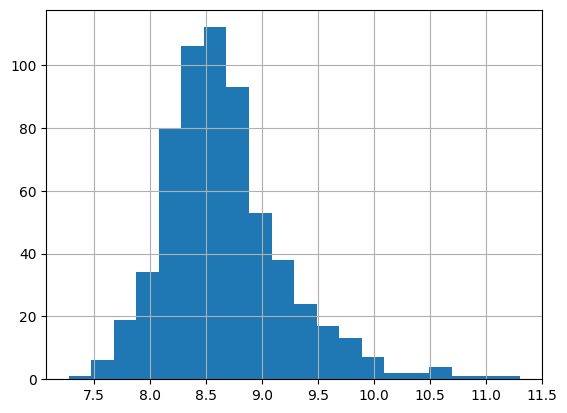

In [108]:
data_train['totalIncomeLog'].hist(bins=20)

In [109]:
def data_split(data):
    X=data.iloc[:,np.r_[1:5,9:11,13:15]].values
    Y=data.iloc[:,12].values
    return X,Y

In [143]:
X,Y=data_split(data_train)

In [144]:
Y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

### Import Data for testing

In [145]:
from sklearn.model_selection import train_test_split

In [152]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [153]:
print(x_train)

[['Male' 'Yes' '0' ... 1.0 4.875197323201151 5858.0]
 ['Male' 'No' '1' ... 1.0 5.278114659230517 11250.0]
 ['Male' 'Yes' '0' ... 0.0 5.003946305945459 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 8334.0]
 ['Male' 'Yes' '0' ... 1.0 5.075173815233827 6033.0]
 ['Female' 'Yes' '0' ... 1.0 5.204006687076795 6486.0]]


In [154]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_X=LabelEncoder()

In [155]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7
0,Male,Yes,0,Graduate,360.0,1.0,4.875197,5858.0
1,Male,No,1,Graduate,360.0,1.0,5.278115,11250.0
2,Male,Yes,0,Graduate,360.0,0.0,5.003946,5681.0
3,Female,No,0,Graduate,180.0,1.0,4.75359,3813.0
4,Male,Yes,2,Graduate,360.0,1.0,5.010635,6095.0
...,...,...,...,...,...,...,...,...
486,Male,Yes,0,Graduate,360.0,1.0,4.382027,4403.0
487,Male,Yes,1,Graduate,360.0,1.0,5.855072,23809.0
488,Male,Yes,3+,Graduate,360.0,1.0,5.298317,8334.0
489,Male,Yes,0,Not Graduate,360.0,1.0,5.075174,6033.0


In [156]:
for i in range(5):
    x_train[:,i]=LabelEncoder_X.fit_transform(x_train[:,i])
x_train[:,7]=LabelEncoder_X.fit_transform(x_train[:,7])

In [157]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7
0,1,1,0,0,7,1.0,4.875197,267
1,1,0,1,0,7,1.0,5.278115,407
2,1,1,0,0,7,0.0,5.003946,249
3,0,0,0,0,4,1.0,4.75359,97
4,1,1,2,0,7,1.0,5.010635,276
...,...,...,...,...,...,...,...,...
486,1,1,0,0,7,1.0,4.382027,142
487,1,1,1,0,7,1.0,5.855072,447
488,1,1,3,0,7,1.0,5.298317,363
489,1,1,0,1,7,1.0,5.075174,273


In [170]:
labelEncoder_Y=LabelEncoder()
y_train=labelEncoder_Y.fit_transform(y_train)

In [159]:
for i in range(5):
    x_test[:,i]=LabelEncoder_X.fit_transform(x_test[:,i])
x_test[:,7]=LabelEncoder_X.fit_transform(x_test[:,7])
y_test=labelEncoder_Y.fit_transform(y_test)

In [162]:
Y_train

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [164]:
from sklearn.preprocessing import StandardScaler
strandarScaler=StandardScaler()
x_train_data=strandarScaler.fit_transform(x_train)
x_test_data=strandarScaler.fit_transform(x_test)

### Desition tree clasifier

In [171]:
from sklearn.tree import DecisionTreeClassifier
DtreeClassifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
DtreeClassifier.fit(x_train_data,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [173]:
y_predict=DtreeClassifier.predict(x_test_data)

In [168]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [174]:
from sklearn import metrics

print('The accuracy of decision tree is:',metrics.accuracy_score(y_predict,y_test))
print('The accuracy of decision tree is:',metrics.accuracy_score(y_test,y_predict))

The accuracy of decision tree is: 0.6991869918699187
The accuracy of decision tree is: 0.6991869918699187


### Apply nave bayse

In [179]:
from sklearn.naive_bayes import GaussianNB
naiveBayesClassifier=GaussianNB()
naiveBayesClassifier.fit(x_train_data,y_train)

GaussianNB()

In [186]:
y_predict_NB=naiveBayesClassifier.predict(x_test_data)

In [187]:
y_predict_NB

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [189]:
print('The accuracy of Naive Bayes is:',metrics.accuracy_score(y_predict_NB,y_test))

The accuracy of Naive Bayes is: 0.8292682926829268


### Import Test Data

In [191]:
predection_data=pd.read_csv('data/test_Y3wMUE5_7gLdaTN.csv')

In [192]:
predection_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [193]:
predection_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [196]:
predection_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [197]:
fill_missing_vals(predection_data)
predection_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<Axes: >

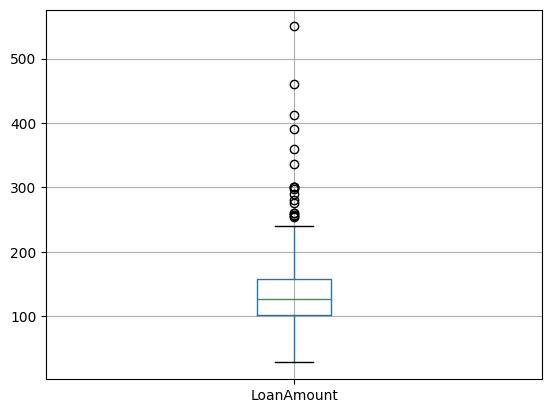

In [198]:
predection_data.boxplot(column='LoanAmount')

<Axes: >

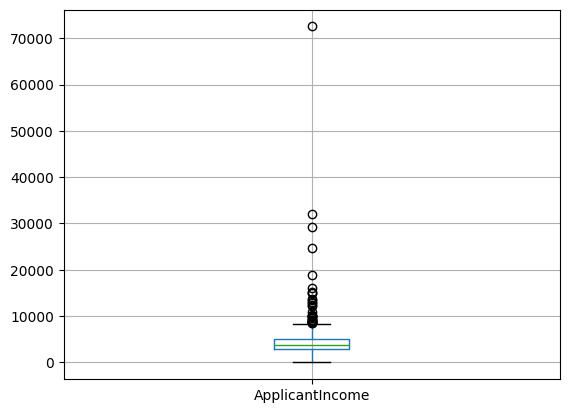

In [199]:
predection_data.boxplot(column='ApplicantIncome')

In [200]:
predection_data['LoanAmountLog']=np.log(data_train['LoanAmount'])

<Axes: >

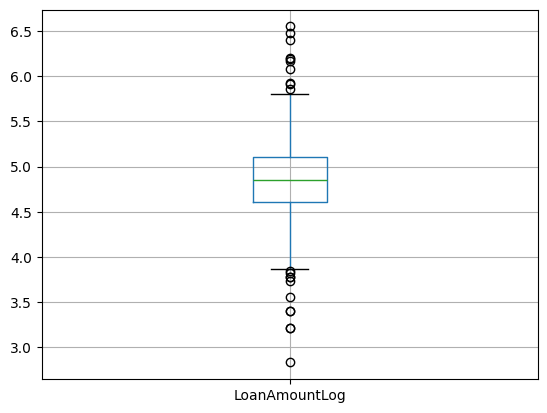

In [201]:
predection_data.boxplot(column='LoanAmountLog')

<Axes: >

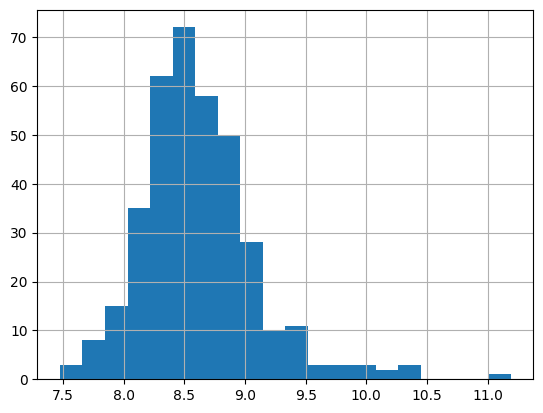

In [202]:
predection_data['totalIncome']=predection_data['ApplicantIncome']+predection_data['CoapplicantIncome']
predection_data['totalIncomeLog']=np.log(predection_data['totalIncome'])
predection_data['totalIncomeLog'].hist(bins=20)

In [210]:
X_predection,_=data_split(predection_data)

In [211]:
X_predection

array([['Male', 'Yes', '0', ..., 1.0, 5720, 8.651724084373843],
       ['Male', 'Yes', '1', ..., 1.0, 4576, 8.428580533059634],
       ['Male', 'Yes', '2', ..., 1.0, 6800, 8.824677891164198],
       ...,
       ['Male', 'No', '0', ..., 0.8254437869822485, 5243,
        8.564649132572534],
       ['Male', 'Yes', '0', ..., 1.0, 7393, 8.9082888855571],
       ['Male', 'No', '0', ..., 1.0, 9200, 9.126958763037132]],
      dtype=object)

In [215]:
for i in range(5):
    X_predection[:,i]=LabelEncoder_X.fit_transform(X_predection[:,i])
X_predection[:,7]=LabelEncoder_X.fit_transform(X_predection[:,7])
##y_test=labelEncoder_Y.fit_transform(y_test)
X_predection=strandarScaler.fit_transform(X_predection)

In [216]:
X_predection

array([[ 0.48547939,  0.75835829, -0.75822199, ...,  0.47917989,
        -0.12618159,  0.34823304],
       [ 0.48547939,  0.75835829,  0.18187082, ...,  0.47917989,
        -0.34650636, -0.48766346],
       [ 0.48547939,  0.75835829,  1.12196363, ...,  0.47917989,
         0.08181731,  0.79135889],
       ...,
       [ 0.48547939, -1.31863792, -0.75822199, ...,  0.        ,
        -0.21804778,  0.01588865],
       [ 0.48547939,  0.75835829, -0.75822199, ...,  0.47917989,
         0.19602411,  0.96256661],
       [ 0.48547939, -1.31863792, -0.75822199, ...,  0.47917989,
         0.54403709,  1.39562142]])

In [217]:
naiveBayesClassifier.predict(X_predection)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,